In [1]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
gdp_df = pd.read_csv(("/Users/rachael.miller/Desktop/gdp_per_capita.csv"))
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [3]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [4]:
gdp_df = pd.read_csv('/Users/rachael.miller/Desktop/gdp_per_capita.csv', skipfooter = 2)
gdp_df.tail()

/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_21442/942466095.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv('/Users/rachael.miller/Desktop/gdp_per_capita.csv', skipfooter = 2)


,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [5]:
del gdp_df['Value Footnotes']
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [6]:
gdp_df.shape

(6868, 3)

In [7]:
gdp_df['Year'].min()

1990

In [8]:
gdp_df['Year'].max()

2019

Years range from 1990-2019

In [9]:
gdp_df[gdp_df['Year'] == 2010].value_counts()

Country                                 Year  GDP_Per_Capita
Afghanistan                             2010  1957.029338       1
Other small states                      2010  20549.352418      1
Nauru                                   2010  6696.529862       1
Nepal                                   2010  2356.292316       1
Netherlands                             2010  52199.164242      1
                                                               ..
Haiti                                   2010  2735.282517       1
Heavily indebted poor countries (HIPC)  2010  2107.194149       1
High income                             2010  43816.334989      1
Honduras                                2010  4866.972176       1
Zimbabwe                                2010  2273.200073       1
Length: 236, dtype: int64

Number of observations start at 207 in 1990 and increase over time to around 238

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [11]:
gdp_df['Country'].nunique()

238

238 countries are represented in this dataset. The smaller populated countries are least represented. The larger countries have been observed since 1990 while the smaller ones have only been observed recently which explains the fewer observations.

In [12]:
gdp_2014=gdp_df[gdp_df['Year']==2014]
gdp_2014.head(10)

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
143,Arab World,2014,14219.562395
173,Argentina,2014,23550.099061
203,Armenia,2014,11019.838785
231,Aruba,2014,35458.608343
261,Australia,2014,47436.748390


In [13]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


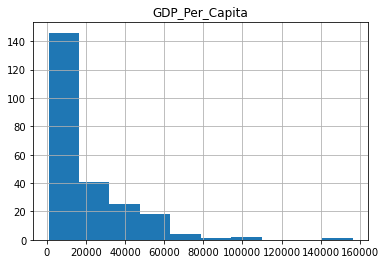

In [14]:
gdp_2014.hist(column='GDP_Per_Capita', bins=10)
plt.show()

Distribution is right skewed

In [15]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541
...,...,...,...
561,Bermuda,2014,77361.104881
5464,Singapore,2014,87808.663157
5138,Qatar,2014,95578.416973
3691,Luxembourg,2014,108760.916030


Top 5 = Macao SAR-China, Luxembourg, Qatar, Singapore, Bermuda.

Bottom 5 = Central African Republic, Burundi, Malawi, Dem. Rep. Congo, Niger

In [16]:
gdp_pivoted = pd.pivot_table(gdp_df, values='GDP_Per_Capita', index=['Country'],
                    columns=['Year'], dropna=True)
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1957.029338,1904.559799,2075.491747,2116.465454,2102.385234,2068.265904,2057.062164,2058.383832,2033.779002,2065.036398
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,11642.194485,11510.557088
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,21115.798269,21910.184985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,7586.384939,8041.178551
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205463,4047.128464,3916.925781,4294.746119,4786.480266,5052.064101,...,5411.066482,5782.689593,5985.683247,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6219.960291
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,16636.415941,16911.193295


In [17]:
gdp_pivoted=gdp_pivoted[[1990, 2017]]
gdp_pivoted

Year,1990,2017
Country,,
Afghanistan,NaN,2058.383832
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
...,...,...
Vietnam,1673.249634,7155.745829
West Bank and Gaza,NaN,6401.740891
World,9680.269697,16253.385518


In [18]:
gdp_pivoted = gdp_pivoted.dropna(how='any')
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


In [19]:
gdp_pivoted['Percent_Change'] = (gdp_pivoted.select_dtypes(include=['int','float']).pct_change(axis=1)[2017])
gdp_pivoted

/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_21442/2026670759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = (gdp_pivoted.select_dtypes(include=['int','float']).pct_change(axis=1)[2017])


Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759436,1.645563
Algeria,8746.352901,11737.409353,0.341978
Angola,5783.429064,7310.901738,0.264112
Antigua and Barbuda,15459.551675,19840.076123,0.283354
Arab World,9694.667544,14555.474921,0.501390
...,...,...,...
Vanuatu,2888.309393,3116.645194,0.079055
Vietnam,1673.249634,7155.745829,3.276556
World,9680.269697,16253.385518,0.679022


In [20]:
(gdp_pivoted < 0).sum().sum()

17

17 countries experienced a negative % change in GDP per capita from 1990 to 2017

In [21]:
gdp_pivoted['Percent_Change'].sort_values(ascending=False)

Country
Equatorial Guinea                              20.684046
China                                           9.074063
Myanmar                                         6.649394
East Asia & Pacific (excluding high income)     4.975603
East Asia & Pacific (IDA & IBRD)                4.973349
                                                 ...    
Central African Republic                       -0.240393
Ukraine                                        -0.246360
Burundi                                        -0.347110
United Arab Emirates                           -0.397210
Dem. Rep. Congo                                -0.417598
Name: Percent_Change, Length: 207, dtype: float64

Equatorial Guinea had the highest & change in GDP per capita.

In [22]:
# Separate Equatorial Guinea from rest of data - named gdp_plot
gdp_plot = gdp_df[gdp_df['Country'] == 'Equatorial Guinea']
gdp_plot 



,Country,Year,GDP_Per_Capita
1754,Equatorial Guinea,2019,18558.003852
1755,Equatorial Guinea,2018,20359.845144
1756,Equatorial Guinea,2017,22551.083246
1757,Equatorial Guinea,2016,24827.072978
1758,Equatorial Guinea,2015,28313.602763
1759,Equatorial Guinea,2014,32436.466793
1760,Equatorial Guinea,2013,33678.706547
1761,Equatorial Guinea,2012,36671.357436
1762,Equatorial Guinea,2011,35378.023284
1763,Equatorial Guinea,2010,34732.255956


In [23]:
# Remove top two rows (2018-2019) from dataset
gdp_plot=gdp_plot.iloc[2:]
gdp_plot

,Country,Year,GDP_Per_Capita
1756,Equatorial Guinea,2017,22551.083246
1757,Equatorial Guinea,2016,24827.072978
1758,Equatorial Guinea,2015,28313.602763
1759,Equatorial Guinea,2014,32436.466793
1760,Equatorial Guinea,2013,33678.706547
1761,Equatorial Guinea,2012,36671.357436
1762,Equatorial Guinea,2011,35378.023284
1763,Equatorial Guinea,2010,34732.255956
1764,Equatorial Guinea,2009,39913.732604
1765,Equatorial Guinea,2008,41249.438662


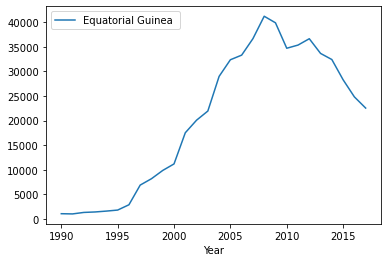

In [24]:
gdp_plot.plot.line(x='Year', y='GDP_Per_Capita', label='Equatorial Guinea ')
plt.show()

In [25]:
# Use same code for China (second largest % change in GDP)
gdp_plot2 = gdp_df[gdp_df['Country'] == 'China']
gdp_plot2 = gdp_plot2.iloc[2:]
gdp_plot2

,Country,Year,GDP_Per_Capita
1164,China,2017,14344.421239
1165,China,2016,13487.822482
1166,China,2015,12691.821553
1167,China,2014,11917.338496
1168,China,2013,11149.867559
1169,China,2012,10397.561415
1170,China,2011,9686.615290
1171,China,2010,8884.588031
1172,China,2009,8069.354638
1173,China,2008,7412.874363


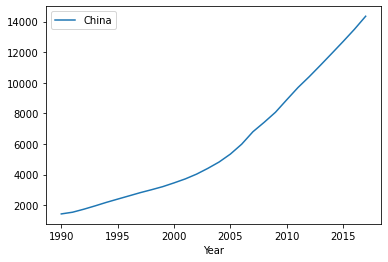

In [26]:
gdp_plot2.plot.line(x='Year', y='GDP_Per_Capita', label='China')
plt.show()

In [27]:
# Merge both dataframes in order to plot both lines on same plot
gdp_merged = pd.merge(gdp_plot, gdp_plot2, how='outer')
gdp_merged

,Country,Year,GDP_Per_Capita
0,Equatorial Guinea,2017,22551.083246
1,Equatorial Guinea,2016,24827.072978
2,Equatorial Guinea,2015,28313.602763
3,Equatorial Guinea,2014,32436.466793
4,Equatorial Guinea,2013,33678.706547
5,Equatorial Guinea,2012,36671.357436
6,Equatorial Guinea,2011,35378.023284
7,Equatorial Guinea,2010,34732.255956
8,Equatorial Guinea,2009,39913.732604
9,Equatorial Guinea,2008,41249.438662


In [28]:
gdp_merged = gdp_merged.pivot(index='Year', columns='Country', values='GDP_Per_Capita')
gdp_merged

Country,China,Equatorial Guinea
Year,,
1990,1423.896348,1039.985049
1991,1534.705272,996.857617
1992,1731.657215,1299.934196
1993,1949.534268,1395.403468
1994,2178.924057,1572.065607
1995,2391.477116,1781.264878
1996,2601.363426,2857.452417
1997,2812.711135,6868.480369
1998,3004.427342,8166.052518


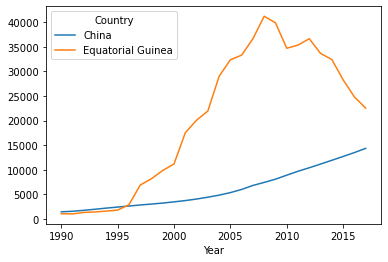

In [29]:
gdp_merged.plot.line()
plt.show()

China shows a slower gradual increase from 1990-2017, while Equatorial Guinea starts to shoot upwards around 1995 ultimately peaking around 2008 then descending in a mountain pattern.

In [30]:
continents = pd.read_csv(("/Users/rachael.miller/Documents/NSS_Projects/un_data_question-RodNSS/data/continents.csv"))
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [31]:
gdp_df = pd.merge(gdp_df, continents, how='inner')
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia


In [32]:
result = gdp_df.groupby('Continent')['Country'].nunique()
result

Continent
Africa           49
Asia             43
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

Number of countries per continent

<AxesSubplot:xlabel='Continent'>

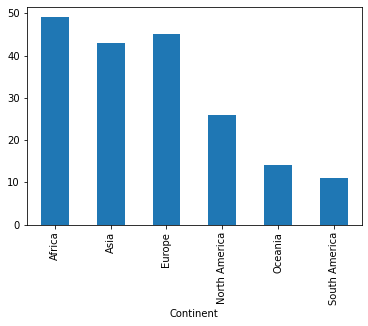

In [33]:
result.plot.bar()

In [34]:
# Slice 2014 data
gdp_df2014 = gdp_df[gdp_df['Year']== 2014]
gdp_df2014

,Country,Year,GDP_Per_Capita,Continent
5,Afghanistan,2014,2102.385234,Asia
23,Albania,2014,11623.866679,Europe
53,Algeria,2014,11512.705405,Africa
83,Angola,2014,8239.828837,Africa
113,Antigua and Barbuda,2014,18104.241470,North America
...,...,...,...,...
5302,Vanuatu,2014,3116.077025,Oceania
5332,Vietnam,2014,6098.489609,Asia
5362,West Bank and Gaza,2014,5967.073437,Asia
5388,Zambia,2014,3450.046561,Africa


<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

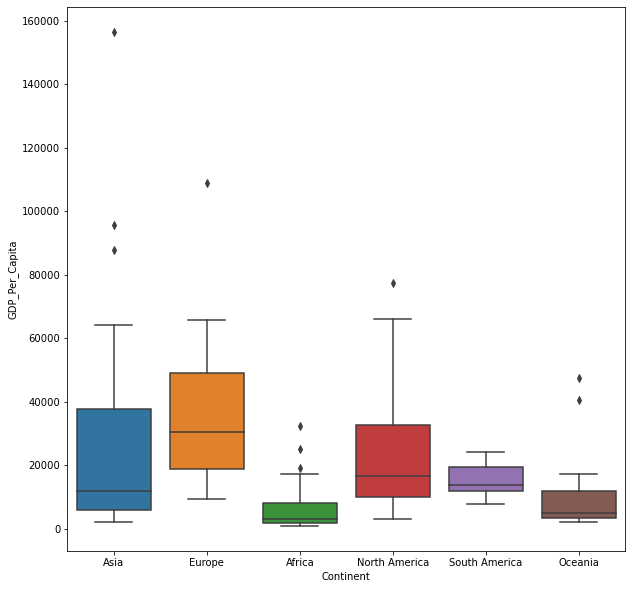

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(data=gdp_df2014, x="Continent", y="GDP_Per_Capita")

Highest outlier is in Asia, lowest gdp in Africa. Highest median is in Europe. Asia, Europe and North America all have a very wide range from lower to upper whisker while Africa, South America, and Oceania have much smaller ranges. The upper whiskers of Asia, Europe and North America are very similar, topping out around 65K.

In [36]:
# add ', header = 2' in order to remove top two rows
life_expectancy = pd.read_csv("/Users/rachael.miller/Documents/NSS_Projects/un_data_question-RodNSS/data/lf.csv", header = 2)
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


In [37]:
life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
life_expectancy.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


In [38]:
life_expectancy=pd.melt(life_expectancy, id_vars=['Country Name'], var_name='Year', value_name='Life_Expectancy')
life_expectancy

,Country Name,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16753,Kosovo,Unnamed: 66,NaN
16754,"Yemen, Rep.",Unnamed: 66,NaN
16755,South Africa,Unnamed: 66,NaN
16756,Zambia,Unnamed: 66,NaN


In [39]:
life_expectancy[life_expectancy.Life_Expectancy > 80].iloc[0]

Country Name           Japan
Year                    1996
Life_Expectancy    80.200244
Name: 9695, dtype: object

In [40]:
life_expectancy.columns = ['Country', 'Year', 'Life_Expectancy']
life_expectancy.head()

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000


In [41]:
gdp_df['Year'] = gdp_df['Year'].astype(int)
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5443 non-null   object 
 1   Year            5443 non-null   int64  
 2   GDP_Per_Capita  5443 non-null   float64
 3   Continent       5443 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


In [42]:
life_expectancy = life_expectancy.dropna(how='any')

In [43]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int)
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14858 entries, 0 to 16225
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          14858 non-null  object 
 1   Year             14858 non-null  int64  
 2   Life_Expectancy  14858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 464.3+ KB


/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_21442/1924062398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy['Year'] = life_expectancy['Year'].astype(int)


In [44]:
gdp_le = pd.merge(gdp_df, life_expectancy, how='inner')
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377


In [45]:
gdp_le.tail()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
4917,Zimbabwe,1994,3263.934978,Africa,52.044
4918,Zimbabwe,1993,3033.504852,Africa,53.653
4919,Zimbabwe,1992,3054.889178,Africa,55.243
4920,Zimbabwe,1991,3426.598094,Africa,56.749
4921,Zimbabwe,1990,3324.348171,Africa,58.100


In [46]:
gdp_le_2019 = gdp_le[gdp_le['Year']==2019]
gdp_le_2019.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
18,Albania,2019,13724.058790,Europe,78.573
48,Algeria,2019,11510.557088,Africa,76.880
78,Angola,2019,6670.332297,Africa,61.147
108,Antigua and Barbuda,2019,21910.184985,North America,77.016


In [47]:
gdp_le_2019[gdp_le_2019['Life_Expectancy'] >= 80].value_counts().sum()

33

33 countries have a life expectancy of at least 80 in 2019.

In [48]:
gdp_le_2019.nlargest(3, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2628,"Macao SAR, China",2019,123965.286432,Asia,84.244000
2598,Luxembourg,2019,114304.044210,Europe,82.639024
3916,Singapore,2019,97341.468645,Asia,83.595122


Macao SAR, China; Luxembourg and Singapore have the top 3 largest GDP per capita in 2019.

In [49]:
top1 = gdp_le[gdp_le['Country'].isin(['Macao SAR, China'])]
top1 = top1.sort_values('Year', ascending=True )
top1.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2657,"Macao SAR, China",1990,48452.817991,Asia,77.296
2656,"Macao SAR, China",1991,48831.199291,Asia,77.607
2655,"Macao SAR, China",1992,53998.995958,Asia,77.926
2654,"Macao SAR, China",1993,55589.533390,Asia,78.253
2653,"Macao SAR, China",1994,56787.692437,Asia,78.588


In [50]:
top2 = gdp_le[gdp_le['Country'].isin(['Luxembourg'])]
top2 = top2.sort_values('Year', ascending=True )
top2.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2627,Luxembourg,1990,67857.540495,Europe,75.010415
2626,Luxembourg,1991,72742.202009,Europe,75.463415
2625,Luxembourg,1992,73088.513663,Europe,75.770732
2624,Luxembourg,1993,75143.191255,Europe,75.712195
2623,Luxembourg,1994,76959.122297,Europe,76.370732


In [51]:
top3 = gdp_le[gdp_le['Country'].isin(['Singapore'])]
top3=top3.sort_values('Year', ascending=True )
top3.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
3945,Singapore,1990,37348.206786,Asia,75.295122
3944,Singapore,1991,38728.403909,Asia,75.646341
3943,Singapore,1992,40077.548794,Asia,75.946341
3942,Singapore,1993,43555.619036,Asia,76.046341
3941,Singapore,1994,46895.053010,Asia,76.197561


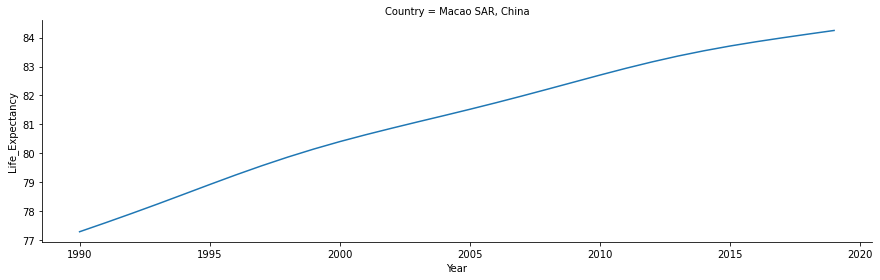

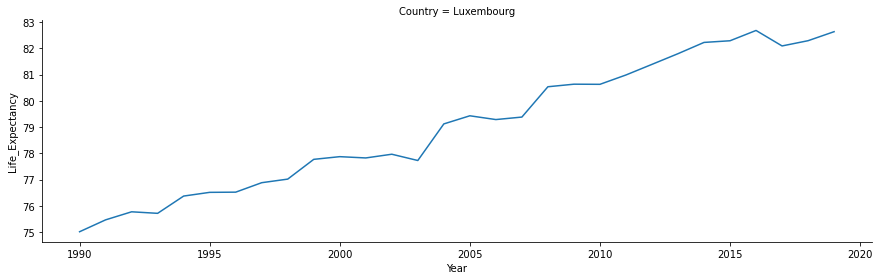

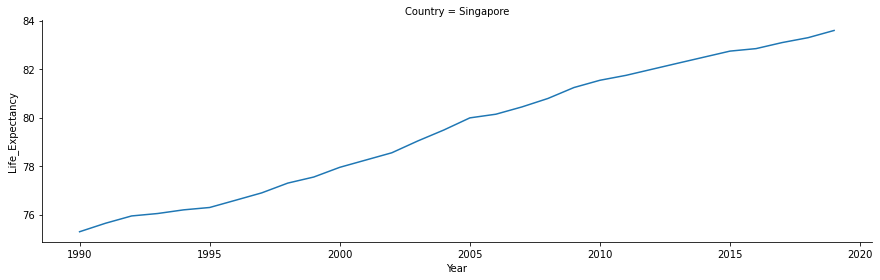

In [52]:
g = sns.FacetGrid(top1, col="Country", 
                  col_wrap=2, 
                  sharex=False, 
                  sharey=False,
                  height=4,
                  aspect=3)
g.map(sns.lineplot, "Year","Life_Expectancy")
plt.show()

g = sns.FacetGrid(top2, col="Country", 
                  col_wrap=2, 
                  sharex=False, 
                  sharey=False,
                  height=4,
                  aspect=3)
g.map(sns.lineplot, "Year","Life_Expectancy")
plt.show()

g = sns.FacetGrid(top3, col="Country", 
                  col_wrap=2, 
                  sharex=False, 
                  sharey=False,
                  height=4,
                  aspect=3)
g.map(sns.lineplot, "Year","Life_Expectancy")
plt.show()

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

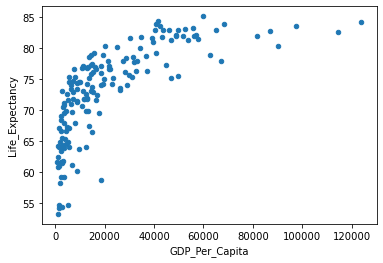

In [53]:
gdp_le_2019.plot.scatter(x='GDP_Per_Capita', y='Life_Expectancy')

In [54]:
gdp_le_2019.corr()

,Year,GDP_Per_Capita,Life_Expectancy
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.709018
Life_Expectancy,NaN,0.709018,1.000000


In [55]:
gdp_le_2019['gdp_log']=np.log(gdp_le_2019.GDP_Per_Capita) 
gdp_le_2019

/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_21442/814847942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['gdp_log']=np.log(gdp_le_2019.GDP_Per_Capita)


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,gdp_log
0,Afghanistan,2019,2065.036398,Asia,64.833,7.632903
18,Albania,2019,13724.058790,Europe,78.573,9.526906
48,Algeria,2019,11510.557088,Africa,76.880,9.351020
78,Angola,2019,6670.332297,Africa,61.147,8.805425
108,Antigua and Barbuda,2019,21910.184985,North America,77.016,9.994707
...,...,...,...,...,...,...
4776,Vanuatu,2019,3153.015168,Oceania,70.474,8.056114
4806,Vietnam,2019,8041.178551,Asia,75.400,8.992331
4836,West Bank and Gaza,2019,6219.960291,Asia,74.053,8.735519
4862,Zambia,2019,3470.448801,Africa,63.886,8.152039


In [56]:
gdp_le_2019.corr()

,Year,GDP_Per_Capita,Life_Expectancy,gdp_log
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.709018,0.851629
Life_Expectancy,NaN,0.709018,1.000000,0.848498
gdp_log,NaN,0.851629,0.848498,1.000000


<AxesSubplot:xlabel='gdp_log', ylabel='Life_Expectancy'>

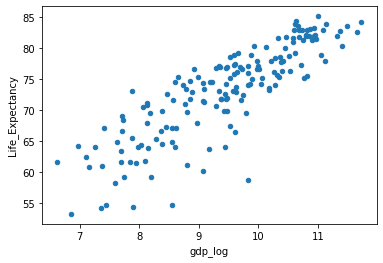

In [57]:
gdp_le_2019.plot.scatter(x='gdp_log', y='Life_Expectancy')

higher correlation - 0.85